# Customer Segmentation

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The task is to segment customers based on their transaction histories. Specify the algorithm you decided to use for this task and the reason behind your choice.

**Things Expected**
- Reasoning behind choice of number of clusters for the segmentation
- A cluster plot with different colors for each cluster
- Description of each cluster i.e. features common across various clusters
- A csv output containing feature averages for each cluster. Do add the number of users in each cluster

**NB:** Kindly add comments to the cells describing what is done at each step

In [1]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd

In [2]:
# reading input data
train_data = pd.read_csv("../../Customer Segmentation/data/data.csv", encoding = "ISO-8859-1")

In [3]:
train_data.shape

(541909, 8)

In [4]:
train_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


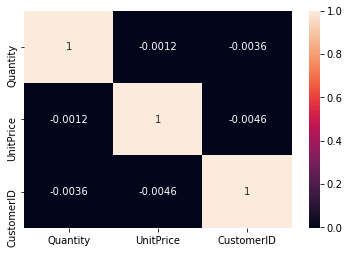

In [6]:
#checking for collinearity in features
import seaborn as sns
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot = True)

#no collinearity in features, so we can go ahead and build model

In [7]:
train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


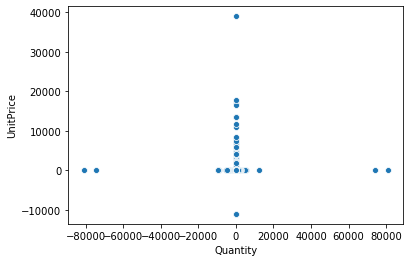

In [8]:
sns.scatterplot(x=train_data['Quantity'], y=train_data['UnitPrice'])

In [9]:
import numpy as np
from scipy import stats
from pandas import DataFrame as df
z_scores = stats.zscore(train_data.loc[:,['Quantity', 'UnitPrice']])


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_train_data = train_data[filtered_entries]

new_train_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


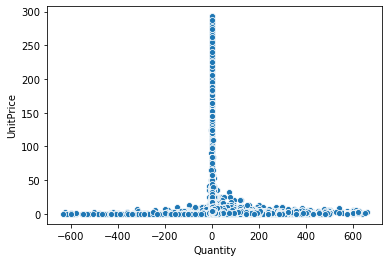

In [10]:
sns.scatterplot(x=new_train_data['Quantity'], y=new_train_data['UnitPrice'])

## Using Only Numerical Features

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(new_train_data.loc[:,['Quantity', 'UnitPrice']])
Labels = kmeans.labels_
Centroids = kmeans.cluster_centers_
print('Labels: ', Labels)
print('Centroids: ', Centroids)


Labels:  [0 0 0 ... 0 0 0]
Centroids:  [[   4.19391644    3.80357028]
 [ 129.19641663    1.43470785]
 [ 395.17408124    1.39564797]
 [-242.86645963    0.72509317]
 [  31.03839199    1.36139336]]


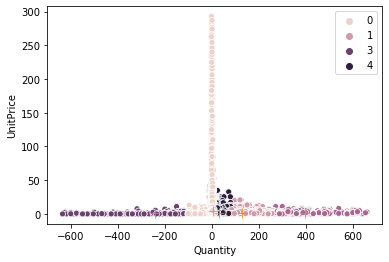

In [12]:
sns.scatterplot(x=new_train_data['Quantity'], y=new_train_data['UnitPrice'], hue=Labels)
sns.scatterplot(x=Centroids[:,0], y=Centroids[:,1], marker='+', s=100)
#hue = np.unique(Labels)

## Using Categorical and Numerical Features

In [13]:
cat_train_data = train_data.drop(['CustomerID', 'InvoiceNo', 'StockCode', 'Description'], axis=1)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [14]:
cat_train_data = cat_train_data.dropna()
cat_train_data.reset_index(inplace = True, drop = True)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [15]:
cat_train_data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [16]:
gb = train_data.groupby(['Country']).count().sort_values(by='InvoiceNo', ascending=False)
lower_values = gb.iloc[15:,]
index_values = lower_values.index.values
index_values

array(['Sweden', 'Unspecified', 'Austria', 'Denmark', 'Japan', 'Poland',
       'Israel', 'USA', 'Hong Kong', 'Singapore', 'Iceland', 'Canada',
       'Greece', 'Malta', 'United Arab Emirates', 'European Community',
       'RSA', 'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic',
       'Bahrain', 'Saudi Arabia'], dtype=object)

In [17]:
cat_train_data.replace(index_values,'Other Countries', inplace=True)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     541909 non-null  int64  
 1   InvoiceDate  541909 non-null  object 
 2   UnitPrice    541909 non-null  float64
 3   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 16.5+ MB


In [18]:
cat_train_data['Country'].value_counts()

United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Other Countries      4466
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Name: Country, dtype: int64

In [19]:
cat_dummies = pd.get_dummies(cat_train_data['Country'], prefix='Country')
cat_train_data = pd.concat([cat_train_data, cat_dummies], axis=1)
cat_train_data.drop('Country', inplace=True, axis=1)
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Quantity                 541909 non-null  int64  
 1   InvoiceDate              541909 non-null  object 
 2   UnitPrice                541909 non-null  float64
 3   Country_Australia        541909 non-null  uint8  
 4   Country_Belgium          541909 non-null  uint8  
 5   Country_Channel Islands  541909 non-null  uint8  
 6   Country_Cyprus           541909 non-null  uint8  
 7   Country_EIRE             541909 non-null  uint8  
 8   Country_Finland          541909 non-null  uint8  
 9   Country_France           541909 non-null  uint8  
 10  Country_Germany          541909 non-null  uint8  
 11  Country_Italy            541909 non-null  uint8  
 12  Country_Netherlands      541909 non-null  uint8  
 13  Country_Norway           541909 non-null  uint8  
 14  Coun

In [20]:
import datetime
date_time_list = []
for date_str in cat_train_data['InvoiceDate']:
    date_time_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y %H:%M')
    time_float = date_time_obj.timestamp()
    date_time_list.append(time_float)

In [21]:
cat_train_data['InvoiceDate'] = date_time_list
cat_train_data

,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,1.291192e+09,2.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1.291192e+09,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,1.323435e+09,0.85,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,6,1.323435e+09,2.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [27]:
import numpy as np
from scipy import stats
from pandas import DataFrame as df
z_scores = stats.zscore(cat_train_data.loc[:,['Quantity', 'UnitPrice']])


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cat_train_data = cat_train_data[filtered_entries]

cat_train_data

,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,1.291192e+09,2.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,8,1.291192e+09,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6,1.291192e+09,3.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12,1.323435e+09,0.85,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,6,1.323435e+09,2.10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,4,1.323435e+09,4.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [51]:
from sklearn.preprocessing import StandardScaler
cat_data_scaled = StandardScaler().fit_transform(cat_train_data.loc[:,['Quantity', 'UnitPrice']])
cat_data_scaled


array([[-0.12413262, -0.13108381],
       [-0.12413262, -0.01696355],
       [-0.04807898, -0.10391232],
       ...,
       [-0.20018626,  0.08628811],
       [-0.20018626,  0.08628811],
       [-0.23821308,  0.19497407]])

In [53]:
cat_train_data['Quantity'] = cat_data_scaled[:,0]
cat_train_data['UnitPrice'] = cat_data_scaled[:,1]
cat_train_data


C:\Users\pyfba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pyfba\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Quantity,InvoiceDate,UnitPrice,Country_Australia,Country_Belgium,Country_Channel Islands,Country_Cyprus,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Norway,Country_Other Countries,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,-0.124133,1.291192e+09,-0.131084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.048079,1.291192e+09,-0.103912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.124133,1.291192e+09,-0.016964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0.104028,1.323435e+09,-0.362041,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541905,-0.124133,1.323435e+09,-0.192220,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541906,-0.200186,1.323435e+09,0.086288,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
541907,-0.200186,1.323435e+09,0.086288,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.cluster import KMeans

cat_kmeans = KMeans(n_clusters=5, random_state=0).fit(cat_train_data)
cat_labels = cat_kmeans.labels_
cat_centroids = cat_kmeans.cluster_centers_
print('Labels: ', cat_labels)
print('Centroids: ', cat_centroids)


Labels:  [3 3 3 ... 4 4 4]
Centroids:  [[ 4.90888106e-02  1.31569991e+09 -2.68488492e-02  2.92543315e-03
   3.90359656e-03  2.60843575e-03  2.89826195e-04  2.18909348e-02
   1.21364719e-03  2.03602902e-02  1.94545833e-02  1.10496237e-03
   5.10818668e-03  2.73523471e-03  9.47369374e-03  3.56848502e-03
   4.72778980e-03  6.41240456e-03  8.94222496e-01]
 [ 6.72852852e-03  1.30109971e+09  3.30824126e-02  2.29560304e-03
   4.55809642e-03  2.21834717e-03  1.24713050e-03  1.45461769e-02
   2.99090588e-03  1.21953911e-02  1.45351404e-02  1.32438637e-03
   4.14974395e-03  5.07681441e-04  6.87577256e-03  2.73706516e-03
   4.11663429e-03  3.44340456e-03  9.22258520e-01]
 [ 1.89356193e-02  1.30839843e+09  1.79163548e-02  4.81647883e-03
   4.54043558e-03  1.12321048e-03  4.47380445e-04  1.70099756e-02
   9.13798355e-04  1.64483704e-02  2.05128693e-02  3.99786780e-04
   5.21626561e-03  2.03700883e-03  1.21459031e-02  2.04652757e-03
   3.92171794e-03  3.05551325e-03  9.05364758e-01]
 [-4.78976665e-0

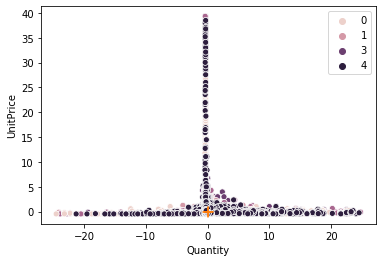

In [57]:
sns.scatterplot(x=cat_train_data['Quantity'], y=cat_train_data['UnitPrice'], hue=cat_labels)
sns.scatterplot(x=cat_centroids[:,0], y=cat_centroids[:,2], marker='+', s=100)
#hue = np.unique(Labels)